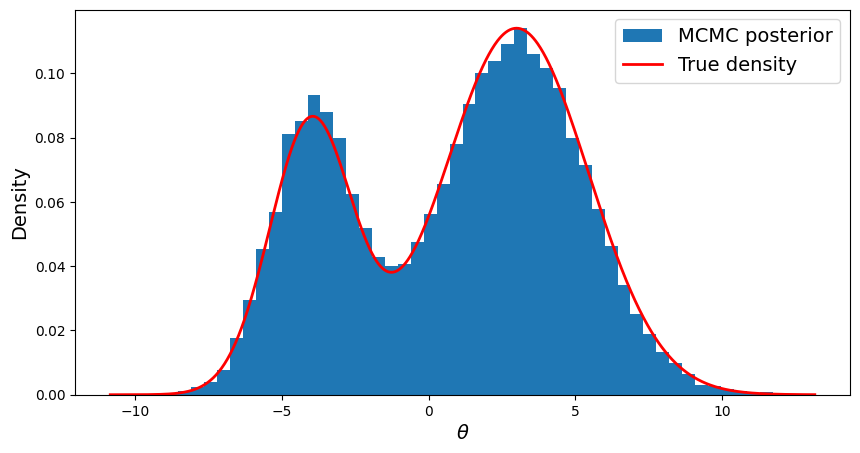

In [17]:
#1

import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

def metroplis(start, value, proposal, niter, nburn=2000, **kwargs):
    current = start
    post = [current]
    for i in range(niter):
        proposed = proposal(current, **kwargs)
        p = value(proposed, **kwargs) / value(current, **kwargs)
        if np.random.rand() < p:
            current = proposed
        post.append(current)
    return post[nburn:]

def proposal(current, sigma, **kwargs):
    _ = kwargs
    current = np.asarray(current)
    sigma = np.asarray(sigma)
    return current + sigma * np.random.randn(*current.shape)

def value(x, mu=10, sigma=3):
    return 0.3*norm(-4, np.sqrt(2)).pdf(x) + 0.7*norm(3, np.sqrt(6)).pdf(x)

post = metroplis(0.2, value, proposal, 50000, sigma=2)
x = np.linspace(min(post)-1, max(post)+1, 1000)
y = value(x)
fig, ax = plt.subplots(1, figsize=(10, 5))
fig.patch.set_facecolor('xkcd:white')
ax.hist(post, bins=50, density=True, label='MCMC posterior')
ax.plot(x, y, 'r-', linewidth = 2, label = 'True density')

plt.legend(fontsize=14)
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

Оценка E[n(ξ)] = 23.644087044534412


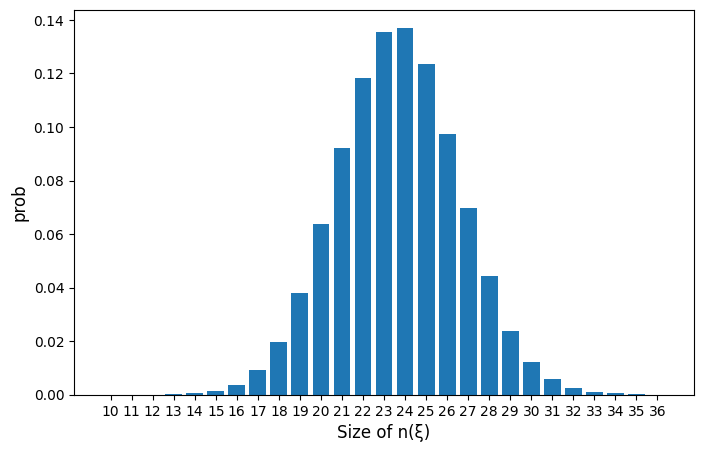

In [54]:
#2

import matplotlib.pyplot as plt
import numpy as np

N = 10

def is_valid(i, j, grid):
    if (i + 1 < N):
        if (grid[i+1][j] == 1):
            return False
    if (j + 1 < N):
        if (grid[i][j+1] == 1):
            return False
    if (j - 1 >= 0):
        if (grid[i][j-1] == 1):
            return False
    if (i - 1 >= 0):
        if (grid[i - 1][j] == 1):
            return False
    return True

def metropolis(start, niter, nburn=6000, **kwargs):

    current = start.copy()
    samples = []
    for _ in range(niter):
        i = np.random.randint(0, N)
        j = np.random.randint(0, N)
        acc = False
        proposed_grid = current.copy()
        if current[i][j] == 0:
            if (is_valid(i, j, current)):
                if np.random.rand() < 0.5:
                    proposed_grid[i][j] = 1
        if (current[i][j] == 1):
            if np.random.rand() < 0.5:
                proposed_grid[i][j] = 0
        current = proposed_grid
        n = np.sum(current)
        samples.append(n)
    return np.array(samples[nburn:])


grid = np.zeros((N, N), dtype=int)
samples = metropolis(grid, 500000)
print("Оценка E[n(ξ)] =", np.mean(samples))

plt.figure(figsize=(8, 5))
plt.hist(samples, bins = np.arange(samples.min(), samples.max() + 1.5) - 0.5, density = True, rwidth = 0.8)
plt.xlabel('Size of n(ξ)', fontsize = 12)
plt.ylabel('prob', fontsize = 12)
plt.xticks(np.arange(samples.min(), samples.max() + 1))
plt.show()